## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


We are going to predict the class column, where a 0 means the patient doesn't have diabetes and 1 that it does. Meaning that we have a binary classification problem.

The first thing that we are going to do is to clean the data.

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

Using pandas to normalize the previous columns, continuos features:

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


Now, we are going to create the feature columns:

In [11]:
import tensorflow as tf

In [13]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [14]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group",["A","B","C","D"])

In [15]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket("Group",hash_bucket_size = 10)

In order to implement some feature engineering on the Age column, we are going to do some EDA on that column:

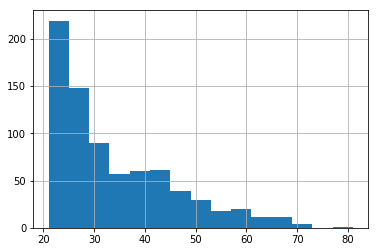

In [20]:
diabetes["Age"].hist(bins=15)

Given that there is a notable difference between each decade we are going to use that as the boundaries to bucketize the Age Column, converting it to a categorical column instead of having a continuos numeric feature. 

In [22]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [24]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

### Train test split

In [25]:
x_data = diabetes.drop("Class",axis = 1)

In [26]:
labels = diabetes["Class"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

### Input Function

In [29]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [30]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Jose\\AppData\\Local\\Temp\\tmpo2eb75r1', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_save_checkpoints_steps': None}


In [31]:
model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Jose\AppData\Local\Temp\tmpo2eb75r1\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 131.995
INFO:tensorflow:loss = 5.91225, step = 101 (0.770 sec)
INFO:tensorflow:global_step/sec: 160.872
INFO:tensorflow:loss = 4.97426, step = 201 (0.616 sec)
INFO:tensorflow:global_step/sec: 139.07
INFO:tensorflow:loss = 6.38145, step = 301 (0.731 sec)
INFO:tensorflow:global_step/sec: 129.973
INFO:tensorflow:loss = 4.50639, step = 401 (0.765 sec)
INFO:tensorflow:global_step/sec: 136.208
INFO:tensorflow:loss = 5.64986, step = 501 (0.745 sec)
INFO:tensorflow:global_step/sec: 105.082
INFO:tensorflow:loss = 5.80817, step = 601 (0.953 sec)
INFO:tensorflow:global_step/sec: 94.4001
INFO:tensorflow:loss = 5.87141, step = 701 (1.046 sec)
INFO:tensorflow:global_step/sec: 115.402
INFO:tensorflow:loss = 5.68466, step = 801 (0.859 sec)
INFO:tensorflow:global_step/sec: 85.3158
INFO

In [32]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size=10, num_epochs=1, shuffle=False)

In [33]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-06-10-18:48:19
INFO:tensorflow:Restoring parameters from C:\Users\Jose\AppData\Local\Temp\tmpo2eb75r1\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-06-10-18:48:22
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.805761, auc_precision_recall = 0.649882, average_loss = 0.519454, global_step = 1000, label/mean = 0.350649, loss = 4.99975, prediction/mean = 0.352714


In [34]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80576134,
 'auc_precision_recall': 0.6498816,
 'average_loss': 0.51945442,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.9997487,
 'prediction/mean': 0.35271397}

### Predictions

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size=10, num_epochs=1, shuffle=False)

In [36]:
predictions = model.predict(pred_input_func)

In [37]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Jose\AppData\Local\Temp\tmpo2eb75r1\model.ckpt-1000


In [38]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.50447619], dtype=float32),
  'logits': array([ 0.01790524], dtype=float32),
  'probabilities': array([ 0.49552381,  0.50447619], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.63046443], dtype=float32),
  'logits': array([ 0.53420985], dtype=float32),
  'probabilities': array([ 0.36953554,  0.63046443], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.35527068], dtype=float32),
  'logits': array([-0.5959506], dtype=float32),
  'probabilities': array([ 0.64472932,  0.35527068], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.31511679], dtype=float32),
  'logits': array([-0.77630502], dtype=float32),
  'probabilities': array([ 0.68488324,  0.31511679], dtype=floa

### DNN Classifier

In [40]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Jose\\AppData\\Local\\Temp\\tmpbrgizbk7', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_save_checkpoints_steps': None}


To use the classifier we need embedded columns:

In [41]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

Now we have to reset the feature columns

In [42]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree , embedded_group_col, age_bucket]

In [43]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [48]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Jose\\AppData\\Local\\Temp\\tmpkzqgm8o5', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_save_checkpoints_steps': None}


In [49]:
dnn_model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Jose\AppData\Local\Temp\tmpkzqgm8o5\model.ckpt.
INFO:tensorflow:loss = 7.4349, step = 1
INFO:tensorflow:global_step/sec: 111.179
INFO:tensorflow:loss = 5.03723, step = 101 (0.909 sec)
INFO:tensorflow:global_step/sec: 107.148
INFO:tensorflow:loss = 7.24916, step = 201 (0.943 sec)
INFO:tensorflow:global_step/sec: 110.084
INFO:tensorflow:loss = 5.27703, step = 301 (0.889 sec)
INFO:tensorflow:global_step/sec: 98.4231
INFO:tensorflow:loss = 5.13021, step = 401 (1.018 sec)
INFO:tensorflow:global_step/sec: 113.946
INFO:tensorflow:loss = 4.23909, step = 501 (0.893 sec)
INFO:tensorflow:global_step/sec: 121.642
INFO:tensorflow:loss = 3.45211, step = 601 (0.815 sec)
INFO:tensorflow:global_step/sec: 115.863
INFO:tensorflow:loss = 4.74198, step = 701 (0.856 sec)
INFO:tensorflow:global_step/sec: 123.998
INFO:tensorflow:loss = 2.92085, step = 801 (0.800 sec)
INFO:tensorflow:global_step/sec: 118.069
INFO

In [ ]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [ ]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-06-10-19:02:53
INFO:tensorflow:Restoring parameters from C:\Users\Jose\AppData\Local\Temp\tmpkzqgm8o5\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-06-10-19:02:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.830123, auc_precision_recall = 0.705661, average_loss = 0.489377, global_step = 1000, label/mean = 0.350649, loss = 4.71025, prediction/mean = 0.353247
